<a href="https://colab.research.google.com/github/sachin2000k/CodeDown-Projects/blob/master/CNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [0]:
model = VGG16(weights = 'imagenet', include_top = True)
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy')

In [0]:
im = cv2.resize(cv2.imread('/content/dog.png'),(224,224)).astype(np.float32)
im = np.expand_dims(im, axis = 0)


In [0]:
from google.colab.patches import cv2_imshow

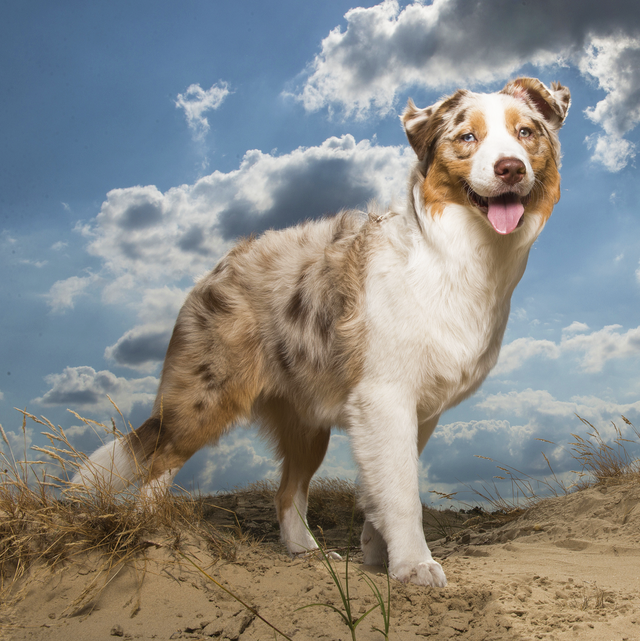

In [26]:
cv2_imshow(cv2.imread('/content/dog.png'))

In [27]:
out = model.predict(im)
index = np.argmax(out)
print(index)

215


In [28]:
out.shape

(1, 1000)

In [0]:
from tensorflow.keras.applications.vgg16 import decode_predictions

In [30]:
label = decode_predictions(out)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Brittany_spaniel (25.15%)


Brittany is the species name of dog

In [0]:
# defingning VGG16 network
def VGG_16(weights_path=None):
  model = models.Sequential()
  model.add(layers.ZeroPadding2D((1,1),input_shape=(224,224, 3)))
  model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
  
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
  model.add(layers.ZeroPadding2D((1,1)))
  model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

  model.add(layers.Flatten())
#top layer of the VGG net
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1000, activation='softmax'))
  
  if weights_path:
    model.load_weights(weights_path)
  return model

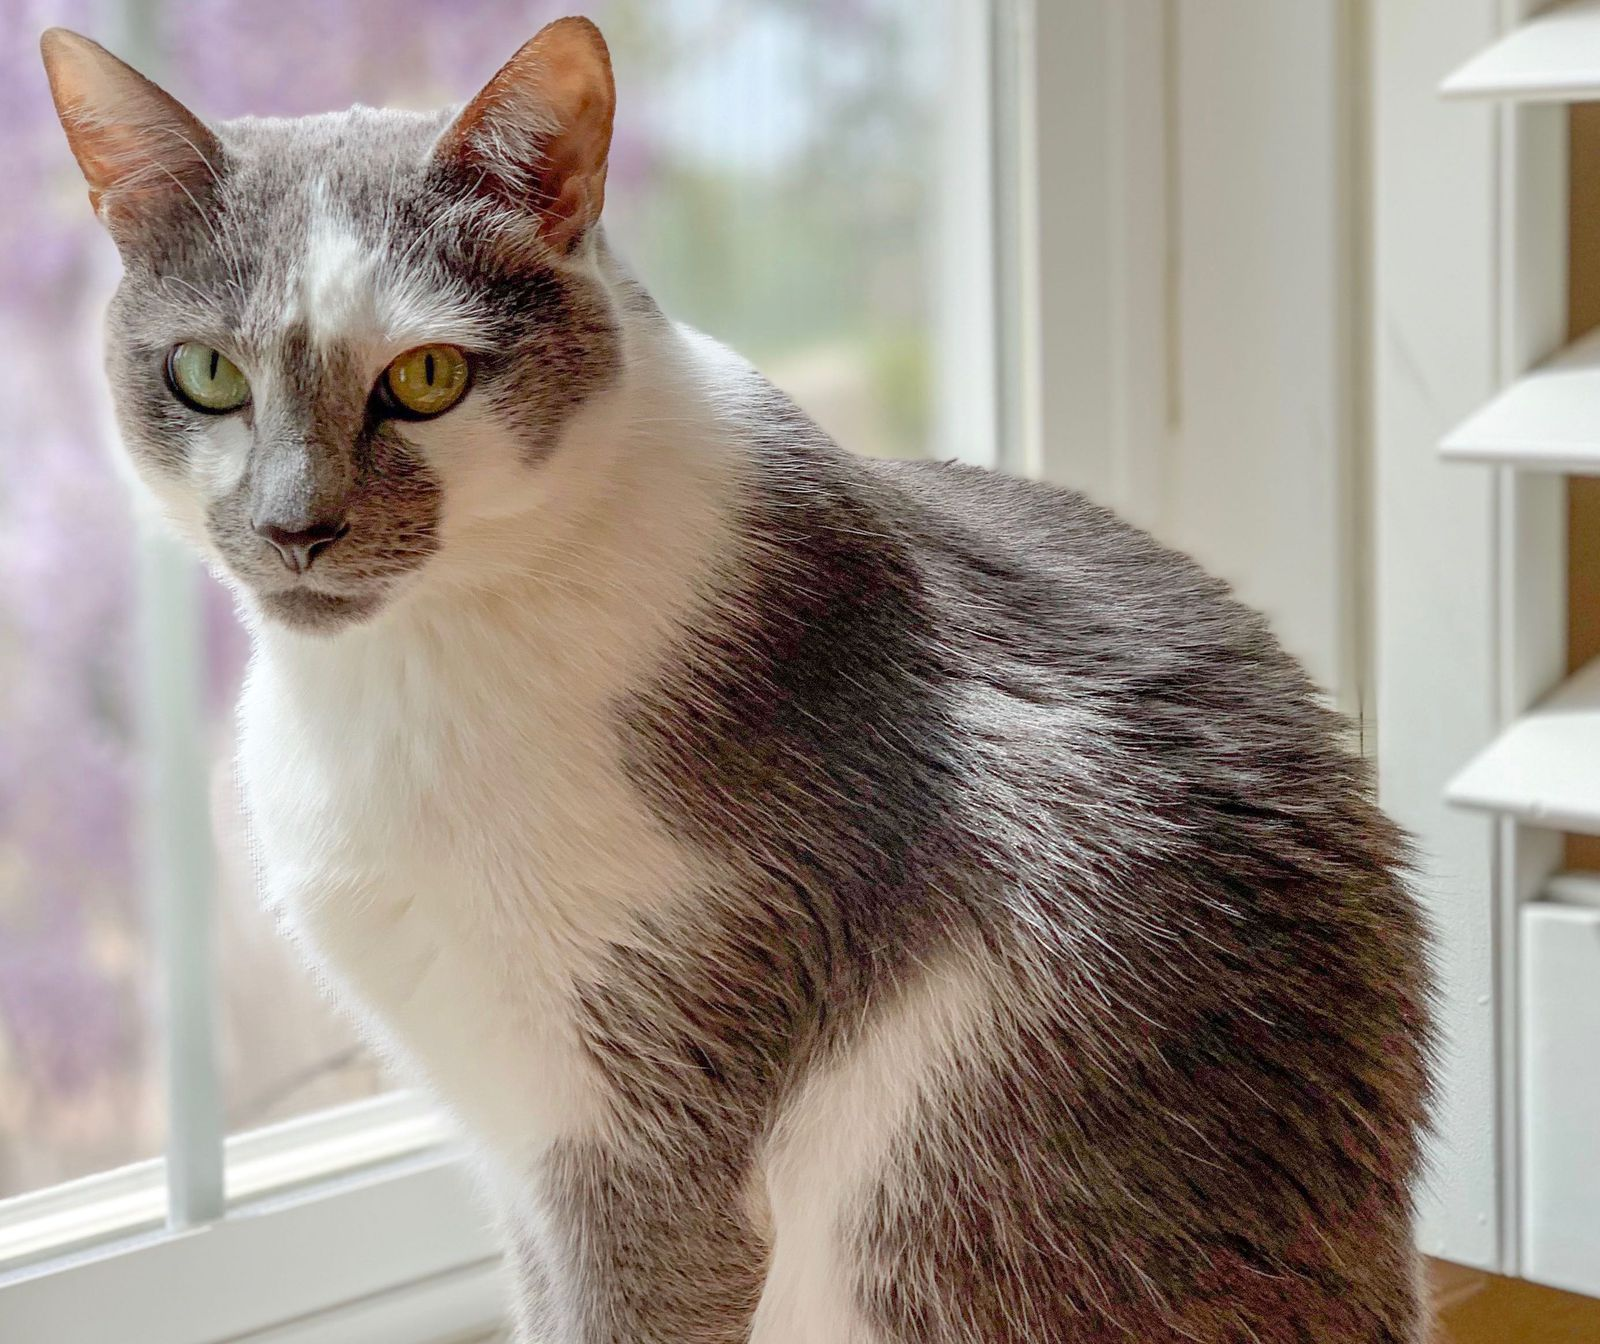

In [58]:
cv2_imshow(cv2.imread('/content/cat.jpg'))

In [38]:

im = cv2.resize(cv2.imread('/content/cat.jpg'),(224,224)).astype(np.float32)
im = np.expand_dims(im, axis =0)
out2 = model.predict(im)
index2 = np.argmax(out2)
print(index2)
label2 = decode_predictions(out2)
label = label2[0][0]
print(label[1], label[2])

285
Egyptian_cat 0.7668558


#Extracting features from specific layers

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import models

In [41]:
base_model = VGG16(weights = 'imagenet', include_top = True)
print(base_model)

In [42]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.output_shape)

0 input_3 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [0]:
model = models.Model(inputs = base_model.input, outputs = base_model.get_layer('block4_pool').output)

img_path = '/content/cat.jpg'
img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x = preprocess_input(x)

In [46]:
features = model.predict(x)
print(features.shape)

(1, 14, 14, 512)


In [0]:
sample = features[0,:,:,1]

In [57]:

cv2_imshow(sample)